In [ ]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import seaborn as sns

from google.colab import drive
drive.mount("/content/drive",force_remount = True)

%matplotlib inline

Mounted at /content/drive


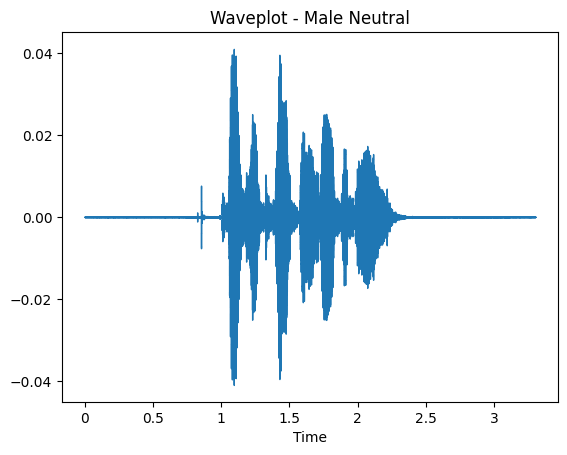

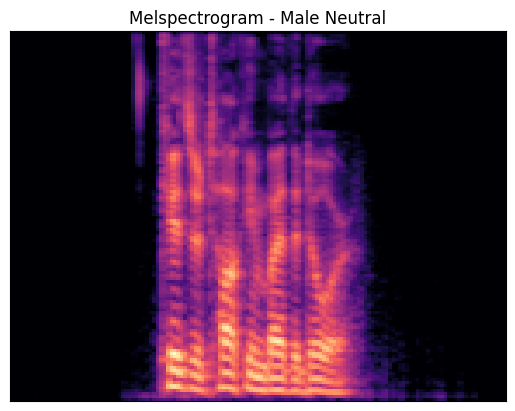

In [ ]:
#LOAD SAMPLE AUDIO (MALE-NEUTRAL)
x,sr = librosa.load("/content/drive/MyDrive/FYP/Code/Emotion-1903/datasets/Audio/Actor_01/03-01-01-01-01-01-01.wav")
librosa.display.waveshow(x,sr = sr)
plt.title('Waveplot - Male Neutral')
plt.show()
melspectrogram = librosa.feature.melspectrogram(y = x,sr = sr)
librosa.display.specshow(librosa.power_to_db(melspectrogram, ref=np.max))
plt.title("Melspectrogram - Male Neutral")
plt.show()

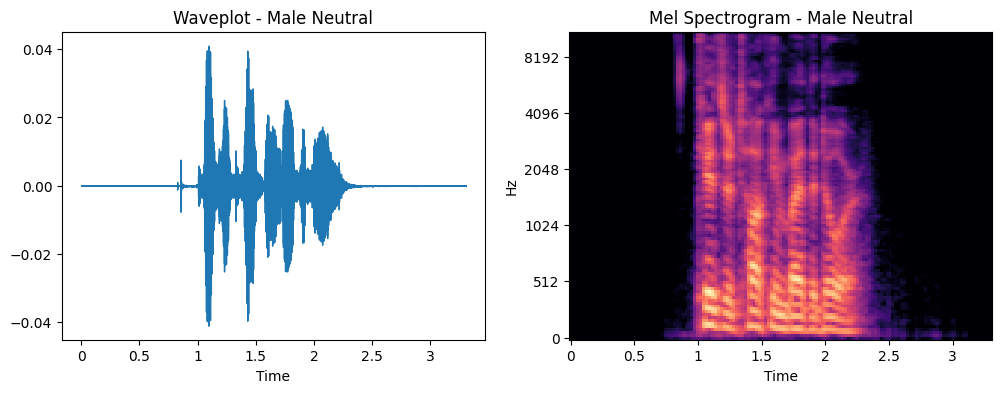

In [ ]:
y, sr = librosa.load("/content/drive/MyDrive/FYP/Code/Emotion-1903/datasets/Audio/Actor_01/03-01-01-01-01-01-01.wav")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
librosa.display.waveshow(y = y, sr=sr)
plt.title('Waveplot - Male Neutral')

plt.subplot(1, 2, 2)
S = librosa.feature.melspectrogram(y = y, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram - Male Neutral')


plt.show()

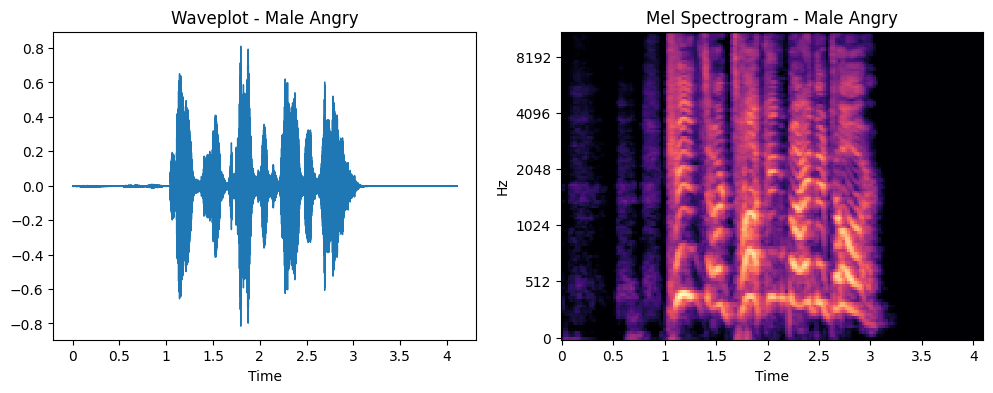

In [ ]:
y, sr = librosa.load("/content/drive/MyDrive/FYP/Code/Emotion-1903/datasets/Audio/Actor_01/03-01-05-02-01-01-01.wav")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
librosa.display.waveshow(y = y, sr=sr)
plt.title('Waveplot - Male Angry')

plt.subplot(1, 2, 2)
S = librosa.feature.melspectrogram(y = y, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram - Male Angry')


plt.show()

In [ ]:
audios = "/content/drive/MyDrive/FYP/Code/Emotion-1903/datasets/Audio/"
actor_folders = os.listdir(audios)
actor_folders.sort()

In [ ]:
emotion = []
gender = []
actor = []
file_path = []
for folder in actor_folders[:-1]:
    filename = os.listdir(audios + folder)
    for file in filename:
        part = file.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg % 2 == 0:
            bg = 'female'
        else:
            bg = 'male'
        gender.append(bg)
        file_path.append(audios+folder+'/' + file)


In [ ]:
emotion_labels_to_emotions = {
    1 : 'neutral',
    2 : 'calm',
    3 : 'happy',
    4 : 'sad',
    5 : 'angry',
    6 : 'fear',
    7 : 'digust',
    8 : 'surprise'
}
for i in range(len(emotion)):
    emotion[i] = emotion_labels_to_emotions[emotion[i]]


In [ ]:
data = [[gender[i],actor[i],emotion[i],file_path[i]] for i in range(len(emotion))]
audio_df = pd.DataFrame(
    data = data,
    columns=['gender','actor','emotion','file_path']
)


In [ ]:
audio_df

,gender,actor,emotion,file_path
0,male,1,neutral,/content/drive/MyDrive/FYP/Code/Emotion-1903/d...
1,male,1,neutral,/content/drive/MyDrive/FYP/Code/Emotion-1903/d...
2,male,1,calm,/content/drive/MyDrive/FYP/Code/Emotion-1903/d...
3,male,1,calm,/content/drive/MyDrive/FYP/Code/Emotion-1903/d...
4,male,1,neutral,/content/drive/MyDrive/FYP/Code/Emotion-1903/d...
...,...,...,...,...
1428,female,24,surprise,/content/drive/MyDrive/FYP/Code/Emotion-1903/d...
1429,female,24,digust,/content/drive/MyDrive/FYP/Code/Emotion-1903/d...
1430,female,24,digust,/content/drive/MyDrive/FYP/Code/Emotion-1903/d...
1431,female,24,digust,/content/drive/MyDrive/FYP/Code/Emotion-1903/d...


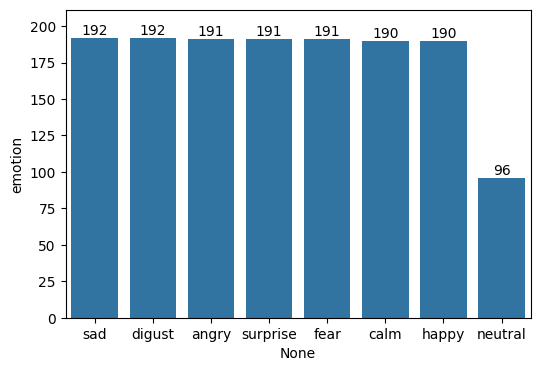

In [ ]:
#DISTRIBUTION OF THE DATASET CLASSES
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(
            x=audio_df['emotion'].value_counts().index,
            y = audio_df['emotion'].value_counts()
           )
ax.bar_label(ax.containers[0])
ax.margins(y=0.1)


In [ ]:
audio_df.to_csv("/content/drive/MyDrive/FYP/Code/Emotion-1903/audio.csv")

In [ ]:

def extract_feature(file_name,mfcc,chroma,mel,zcr,rmse):

    X,sample_rate = librosa.load(file_name,sr=None)
    stft = np.abs(librosa.stft(X))

    result = []

    if mfcc:
        mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=40)
        result.extend(list(np.mean(mfccs,axis=1)))

    if chroma:
        chroma = librosa.feature.chroma_stft(S=stft,y=X,sr=sample_rate)
        result.extend(list(np.mean(chroma,axis=1)))

    if mel:
        mel = librosa.feature.melspectrogram(y=X,sr = sample_rate)
        result.extend(list(np.mean(mel,axis=1)))

    if zcr:
        zcr = librosa.feature.zero_crossing_rate(y=X,frame_length=2048,hop_length=512)
        result.extend(list(np.mean(zcr,axis=1)))

    if rmse:
        rmse = librosa.feature.rms(S=stft,frame_length=2048,hop_length=512,pad_mode='reflect')
        result.extend(list(np.mean(rmse,axis=1)))

    result = np.array(result)
    return result

In [ ]:
X = []
for file in audio_df.file_path:
    feature = extract_feature(file,mfcc=True,chroma=True,mel=True,zcr=True,rmse=True)
    X.append(feature)

emotions_labels = []
for e in audio_df.emotion:
    emotions_labels.append(e)


In [ ]:
features = np.array(X)
print(features.shape)
print(len(emotions_labels))

(1433, 182)
1433


In [ ]:
df = pd.DataFrame(features)

In [ ]:
df.head()
audio_features = df.to_numpy()
np.save("/content/drive/MyDrive/FYP/Code/Emotion-1903/audio_features.npy",audio_features)

In [ ]:
temp = pd.Series(emotions_labels)
temp = pd.DataFrame(temp,columns= ['labels'])
df = pd.concat([df,temp],axis = 1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,labels
0,-726.217224,68.541420,3.293398,12.205300,5.510278,13.667410,-2.983829,3.098030,-3.310813,-1.564384,...,6.421367e-08,4.124776e-08,2.838040e-08,2.313613e-08,1.160461e-08,5.817648e-09,5.361052e-09,0.050476,0.001260,neutral
1,-719.128296,70.201569,1.168397,13.122543,7.836950,14.411290,-4.111360,4.468973,-3.539367,-3.658607,...,8.255937e-08,5.679201e-08,4.239203e-08,2.718321e-08,2.001875e-08,6.524588e-09,5.564329e-09,0.052904,0.001338,neutral
2,-759.921753,75.783524,6.023605,14.557394,6.454188,14.631508,-3.004551,4.620970,-5.200016,-0.707430,...,5.054071e-08,3.130157e-08,1.891350e-08,1.092557e-08,6.905552e-09,5.926896e-09,5.486473e-09,0.045929,0.000945,calm
3,-733.524902,81.589859,4.863358,14.423686,5.267689,13.968560,-3.085617,7.173246,-4.821439,-0.967449,...,7.835509e-07,8.413041e-07,6.233172e-07,4.751564e-07,2.554171e-07,2.123496e-08,5.923756e-09,0.045950,0.001542,calm
4,-710.975281,67.564880,5.782241,13.230726,6.190845,12.628252,-1.675169,5.657494,-4.950634,-3.477545,...,1.029299e-06,5.594726e-07,2.913224e-07,1.172284e-07,4.113968e-08,7.309259e-09,5.700877e-09,0.053835,0.001509,neutral


In [ ]:
df.to_csv("/content/drive/MyDrive/FYP/Code/Emotion-1903/audio_features.csv")

In [ ]:
df[[column for column in df.columns if column not in ["labels"]]]

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
0,-726.217224,68.541420,3.293398,12.205300,5.510278,13.667410,-2.983829,3.098030,-3.310813,-1.564384,...,1.358981e-07,6.421367e-08,4.124776e-08,2.838040e-08,2.313613e-08,1.160461e-08,5.817648e-09,5.361052e-09,0.050476,0.001260
1,-719.128296,70.201569,1.168397,13.122543,7.836950,14.411290,-4.111360,4.468973,-3.539367,-3.658607,...,1.706452e-07,8.255937e-08,5.679201e-08,4.239203e-08,2.718321e-08,2.001875e-08,6.524588e-09,5.564329e-09,0.052904,0.001338
2,-759.921753,75.783524,6.023605,14.557394,6.454188,14.631508,-3.004551,4.620970,-5.200016,-0.707430,...,9.219604e-08,5.054071e-08,3.130157e-08,1.891350e-08,1.092557e-08,6.905552e-09,5.926896e-09,5.486473e-09,0.045929,0.000945
3,-733.524902,81.589859,4.863358,14.423686,5.267689,13.968560,-3.085617,7.173246,-4.821439,-0.967449,...,2.211943e-07,7.835509e-07,8.413041e-07,6.233172e-07,4.751564e-07,2.554171e-07,2.123496e-08,5.923756e-09,0.045950,0.001542
4,-710.975281,67.564880,5.782241,13.230726,6.190845,12.628252,-1.675169,5.657494,-4.950634,-3.477545,...,9.816201e-07,1.029299e-06,5.594726e-07,2.913224e-07,1.172284e-07,4.113968e-08,7.309259e-09,5.700877e-09,0.053835,0.001509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,-621.794617,47.170418,-13.756863,7.059651,-8.252429,-0.769696,-10.566842,-2.966443,-11.259698,-5.094503,...,3.254073e-05,2.921275e-05,1.416692e-05,5.613014e-06,2.817129e-06,1.319440e-06,9.831515e-08,7.972925e-09,0.088413,0.003718
1429,-543.797607,52.419262,-20.447172,5.142262,-11.263175,-1.644451,-17.689423,-6.546811,-16.154222,-7.951880,...,5.005502e-05,4.231541e-05,4.241331e-05,3.343887e-05,2.705999e-05,1.645018e-05,2.127560e-06,1.303467e-08,0.086414,0.007171
1430,-643.164368,73.104172,-8.130316,4.744410,-9.804203,-7.914150,-11.439941,-2.596603,-14.067657,-10.387165,...,7.649930e-07,6.232036e-07,3.164243e-07,2.188070e-07,1.223605e-07,7.854751e-08,1.472487e-08,7.207780e-09,0.070999,0.001616
1431,-621.328125,68.568832,-22.176456,6.305642,-2.012577,-6.677046,-12.559688,-5.389576,-14.246054,-9.887771,...,2.623553e-06,1.436637e-06,1.183560e-06,8.157920e-07,3.890968e-07,1.776484e-07,3.075240e-08,9.188009e-09,0.079702,0.003509
